In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_data(var,channel,dir='../build/'):
    return np.loadtxt(dir+'h'+var+'_'+channel+'.hst')

In [3]:
colList=['3S1_cs','3S1_co','1S0_co','3P0_co'];

In [25]:
# LDME
r=-100;
mc=1.5;
LDME = {};
LDME['3S1_cs']=0.270;
LDME['3S1_co']=6.6e-3;
LDME['1S0_co']=2.2e-2*3/(3*r + 1);
LDME['3P0_co']=2.2e-2*3*mc**2*r/(3*r + 1);
print(LDME)

{'1S0_co': -0.00022073578595317728, '3S1_co': 0.0066, '3P0_co': 0.04966555183946489, '3S1_cs': 0.27}


In [26]:
def add(A,B):
    return np.array([ [A[i,0],A[i,1]+B[i,1]] for i in range(len(A))])
def mult(A,B):
    return np.array([ [A[i,0],A[i,1]*B[i,1]] for i in range(len(A))])
def div(A,B):
    return np.array([ [A[i,0],A[i,1]/B[i,1]] for i in range(len(A))])
def multC(c, A):
    return np.array( [ [A[i,0],c*A[i,1]] for i in range(len(A))])

In [27]:
data={};
var='W';
all=multC(0,load_data(var,'3S1_cs'))
for ch in colList:
    data[ch]=multC(LDME[ch],load_data(var,ch))
    all = add(all,data[ch])

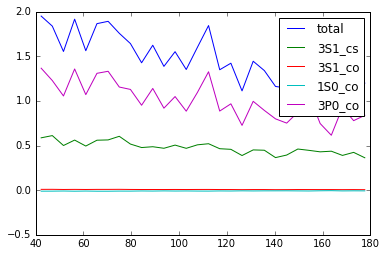

In [28]:
plt.plot(all[:,0],all[:,1],label='total');
for ch in colList:
    plt.plot(data[ch][:,0],data[ch][:,1],label=ch)
plt.legend(loc='best')
#plt.yscale('log')

In [18]:
LDME

{'1S0_co': 0.066, '3P0_co': 0.0, '3S1_co': 0.0066, '3S1_cs': 0.27}

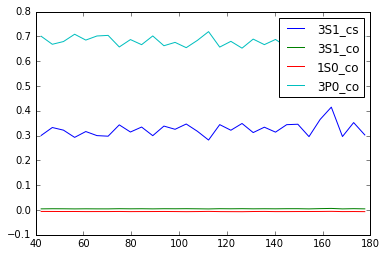

In [29]:
rat={}
for ch in colList:
    rat[ch]=div(data[ch],all)
    plt.plot(rat[ch][:,0],rat[ch][:,1],label=ch)
plt.legend(loc='best')